In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [50]:
from dateutil.relativedelta import relativedelta
last_date = dt.date.fromisoformat(session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0])
one_year_ago = last_date - relativedelta(years = 1)
str(one_year_ago)

'2016-08-23'

In [65]:
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > str(one_year_ago)).all()
df = pd.DataFrame(last_year_data)
df.set_index("date", inplace=True)
df.sort_index(inplace = True)
df_grouped = df.groupby(df.index).sum()

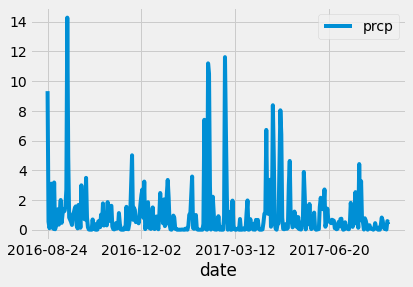

In [68]:
df_grouped.plot()

In [84]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(f"Mean: {round(df.mean()[0],3)}")
print(f"Median: {round(df.median()[0],3)}")
print(f"Mode: {round(df.prcp.mode()[0],3)}")

Mean: 0.176
Median: 0.02
Mode: 0.0


In [85]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station).count()
num_stations

9

In [121]:
# What are the most active stations? (i.e. what stations have the most rows)?
df_stations = pd.Series(session.query(Measurement.station))
# List the stations and the counts in descending order.
df_stations.value_counts()

(USC00519281,)    2772
(USC00519397,)    2724
(USC00513117,)    2709
(USC00519523,)    2669
(USC00516128,)    2612
(USC00514830,)    2202
(USC00511918,)    1979
(USC00517948,)    1372
(USC00518838,)     511
dtype: int64

In [123]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station = "USC00519281"
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == active_station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

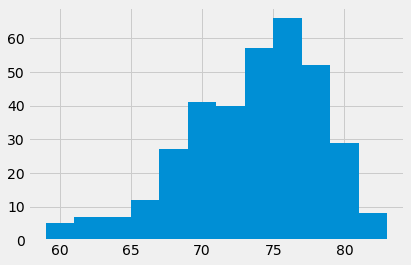

In [124]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
response = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > str(one_year_ago)).\
    filter(Measurement.station == active_station).all()
temp_data = [temp[1] for temp in response]
plt.hist(temp_data, density=False, bins = 12)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
